In [ ]:
import numpy as np
from qibo import hamiltonians, set_backend
from boostvqe.models.dbi.double_bracket import (
    DoubleBracketGeneratorType,
    DoubleBracketIteration,
)
from boostvqe.models.dbi.utils import *
from boostvqe.models.dbi.utils_scheduling import *
from boostvqe.models.dbi.utils_dbr_strategies import *

from qibo import hamiltonians
from boostvqe.compiling_XXZ import *

import matplotlib.pyplot as plt
from utils import *

In [ ]:
dbi = initialize_dbi(5, "TFIM", 3)
dbi.cost = DoubleBracketCostFunction.off_diagonal_norm
dbi.mode = DoubleBracketGeneratorType.single_commutator
nqubits = dbi.h.nqubits
print(dbi.off_diagonal_norm)
print(dbi.diagonal_h_matrix)

In [ ]:
NSTEPS = 10
dbi.scheduling = DoubleBracketScheduling.grid_search
loss_list = []
s_plot_list = []

In [ ]:
d_names = [
    "fix",
    "GWW"
]

In [ ]:
print("initial", dbi.diagonal_h_matrix)
for GWW in [False, True]:
    dbi_eval = deepcopy(dbi)
    ls = [dbi.off_diagonal_norm]
    ss = [] 
    for _ in range(NSTEPS):
        if GWW is True:
            d = dbi_eval.diagonal_h_matrix
        else:
            d = dbi.diagonal_h_matrix
        s = dbi_eval.choose_step(d=d)
        dbi_eval(s, d=d)
        ls.append(dbi_eval.off_diagonal_norm)
        ss.append(s)
    loss_list.append(ls)
    s_plot_list.append(s_to_plot(ss))

In [ ]:
for i, d_name in enumerate(d_names):
    plt.plot(s_plot_list[i], loss_list[i], label=d_name, marker='.')
    # plt.plot(loss_list[i], label=d_name, marker='.')
plt.ylabel(r'$||\sigma(\hat H)||$')
plt.xlabel(r'DBR duration $s$')
# plt.xlabel('Iterations')
# plt.legend(bbox_to_anchor=(1, -0.2),shadow=False, ncol=4)
plt.legend()
plt.tight_layout() 
plt.plot()

In [ ]:
dbi_eval.diagonal_h_matrix

In [ ]:
from utils import *

In [ ]:
dbi = initialize_dbi(5, "XXZ", 0.5)

In [ ]:
dephasing = dbi.diagonal_h_matrix
print(dephasing)

In [ ]:
pauli_operator_dict_2 = generate_pauli_operator_dict(nqubits, 2)
ising_coef = [0] * nqubits + [0.5 if abs(y - x) == 1 or abs(y - x) == (nqubits-1) else 0 for x, y in list(pauli_operator_dict_2)[dbi.h.nqubits:]]
ising = ising_diag(dbi, ising_coef, pauli_operator_dict_2)
print(ising)

In [23]:
dbi = initialize_dbi(5, "XXZ", 0.5)
dbi.ref_state = np.zeros(2**nqubits)
dbi.ref_state[3] = 1
print(dbi.ref_state)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
def plot_matrix_inset(axes, loc, parent_axis, matrix, xy, xytext):
    axin = inset_axes(parent_axis, loc=loc, width="10%", height="10%", loc=loc)
    inset = axin.imshow(matrix, cmap='RdBu')

    divider = make_axes_locatable(axin)
    div_ax = divider.append_axes("right", size="10%", pad=0.05)
    cbar = plt.colorbar(inset, cax = div_ax )
    parent_axis.annotate(' ',
        xy=(xy), 
        xytext=(xytext),  
        textcoords='axes fraction',
        arrowprops=dict(facecolor='black', shrink=1),
        horizontalalignment='left',
        verticalalignment='bottom')
    D = matrix.shape[0]
    axin.set_yticks(range(D))  
    axin.set_xticklabels([1]+['']*(D-2)+[D])
    axin.set_yticklabels([1]+['']*(D-2)+[D])
    axin.set_xticks(range(D))

TypeError: inset_axes() missing 2 required positional arguments: 'width' and 'height'

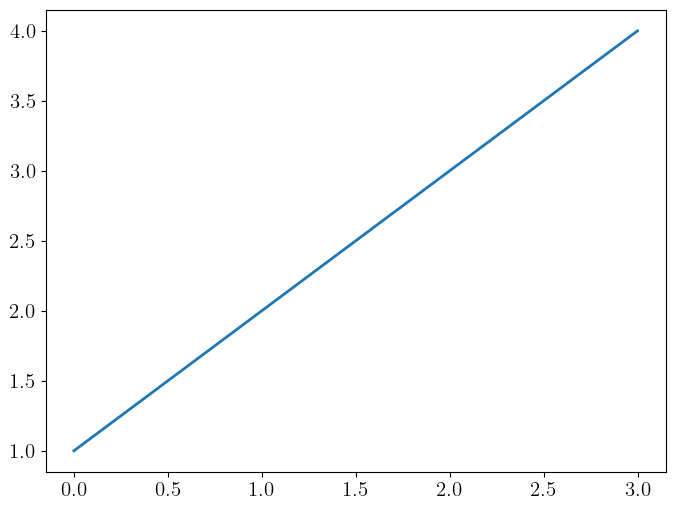

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot([1,2,3,4,])
a = np.array([[1,2,3,4],[3,4,4,5],[3,4,4,5],[3,4,4,5]])
plot_matrix_inset([0.06,.12, 0.31, 0.31], 'upper right', ax, a, (1,1), (0.5,1))

In [ ]:
import numpy as np
from qibo import hamiltonians, set_backend
from boostvqe.models.dbi.double_bracket import (
    DoubleBracketGeneratorType,
    DoubleBracketIteration,
)
from boostvqe.models.dbi.utils import *
from boostvqe.models.dbi.utils_scheduling import *
from boostvqe.models.dbi.utils_dbr_strategies import *

from qibo import hamiltonians
from boostvqe.compiling_XXZ import *

import matplotlib.pyplot as plt
from utils import *


In [ ]:

run_param_rc(15)
fig, ax = plt.subplots()
dbi = initialize_dbi(5, "XXZ", 0.5)
dbi.cost = DoubleBracketCostFunction.off_diagonal_norm
dbi.mode = DoubleBracketGeneratorType.single_commutator
nqubits = dbi.h.nqubits

d_names = [
            'GWW (canonical)',
           'Pauli-Z',
           'Gradient descent (computational)',
           'Gradient descent (pauli-1)',
           'Gradient descent (pauli-2)',
           ]

NSTEPS = 10
dbi.scheduling = DoubleBracketScheduling.grid_search
loss_list = []
s_plot_list = []

# GWW
dbi_eval = deepcopy(dbi)
ls = [dbi_eval.off_diagonal_norm]
ss = []
for _ in range(NSTEPS):
    d = dbi_eval.diagonal_h_matrix
    s = dbi_eval.choose_step(d=d)
    dbi_eval(s, d=d)
    ls.append(dbi_eval.off_diagonal_norm)
    ss.append(s)
loss_list.append(ls)
s_plot_list.append(s_to_plot(ss))
final_gww = deepcopy(dbi_eval.h.matrix)
print(final_gww)
plot_matrix_inset([0.06,.12, 0.31, 0.31], ax, final_gww.real, (s, ls[-1]))
ax.axhline()


In [ ]:

# pauli-Z
generate_local_Z = generate_Z_operators(nqubits)
Z_ops = list(generate_local_Z.values())
Z_names = list(generate_local_Z.keys())
dbi_eval = deepcopy(dbi)
ls = [dbi.off_diagonal_norm]
ss = [] 
for _ in range(NSTEPS):
    dbi_eval, idx, step, flip_sign = select_best_dbr_generator(dbi_eval, Z_ops, compare_canonical=False)
    d = Z_ops[idx]
    ls.append(dbi_eval.off_diagonal_norm)
    ss.append(step)
loss_list.append(ls)
s_plot_list.append(s_to_plot(ss))
final_pauli = deepcopy(dbi_eval.h.matrix)

# gradient descent 
parameterizations = [ParameterizationTypes.computational,ParameterizationTypes.pauli, ParameterizationTypes.pauli]
pauli_op_dict = generate_pauli_operator_dict(nqubits, 2)
seed = 10
d_params = [np.random.random(2**nqubits), np.random.random(nqubits), np.random.random(int(nqubits*(nqubits-1)/2)) ]
for i,parameterization in enumerate(parameterizations):
    dbi_eval = deepcopy(dbi)
    ls = [dbi.off_diagonal_norm]
    ss = [] 
    d_param = d_params[i]
    for _ in range(NSTEPS):
        d_param, d, s = gradient_descent(dbi_eval, d_param, parameterization, pauli_op_dict, pauli_parameterization_order=i)
        ss.append(s)
        dbi_eval(step=s, d=d)
        ls.append(dbi_eval.off_diagonal_norm)
    loss_list.append(ls)
    s_plot_list.append(s_to_plot(ss))

for i, d_name in enumerate(d_names):
    plt.plot(s_plot_list[i], loss_list[i], label=d_name, marker='.')
    # plt.plot(loss_list[i], label=d_name, marker='.')
plt.ylabel(r'$||\sigma(\hat H)||$')
plt.xlabel(r'DBR duration $s$')
plt.axhline(8, linestyle='--', label="min(BHMM)", color='0.8')
# plt.xlabel('Iterations')
plt.legend(bbox_to_anchor=(1, -0.2),shadow=False, ncol=4)
plt.legend()
plt.tight_layout() 
plt.savefig('variational_XXZ_5_0.5.pdf')